In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Loading the datasets
reviews_path = 'googleplaystore_user_reviews.csv'
store_path = 'googleplaystore.csv'


In [14]:
# Reading the data
reviews_df = pd.read_csv(reviews_path)
store_df = pd.read_csv(store_path)

# Displaying basic info about the datasets
print("User Reviews Dataset Info:")
reviews_df.info()
print("\nGoogle Play Store Dataset Info:")
store_df.info()

User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB

Google Play Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non

In [15]:
# Displaying the first few rows
print("\nUser Reviews Dataset Head:")
print(reviews_df.head())
print("\nGoogle Play Store Dataset Head:")
print(store_df.head())

# Checking for missing values
print("\nMissing Values in User Reviews Dataset:")
print(reviews_df.isnull().sum())
print("\nMissing Values in Google Play Store Dataset:")
print(store_df.isnull().sum())


User Reviews Dataset Head:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  

Google Play Store Dataset Head:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & 

In [16]:
# Dropping duplicate entries in both datasets
reviews_df.drop_duplicates(inplace=True)
store_df.drop_duplicates(inplace=True)

# Basic statistics
print("\nDescriptive Statistics for Google Play Store Dataset:")
print(store_df.describe(include='all'))



Descriptive Statistics for Google Play Store Dataset:
           App Category       Rating Reviews                Size    Installs  \
count    10358    10358  8893.000000   10358               10358       10358   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1943          NaN     593                1526        1488   
mean       NaN      NaN     4.189542     NaN                 NaN         NaN   
std        NaN      NaN     0.545452     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN 

In [17]:
# Handling missing values
# For simplicity, we'll drop rows with missing values
reviews_df.dropna(inplace=True)
store_df.dropna(inplace=True)


In [18]:
# Analyzing app categories
category_counts = store_df['Category'].value_counts()
print("\nTop 5 App Categories:")
print(category_counts.head())



Top 5 App Categories:
Category
FAMILY          1717
GAME            1074
TOOLS            733
PRODUCTIVITY     334
FINANCE          317
Name: count, dtype: int64


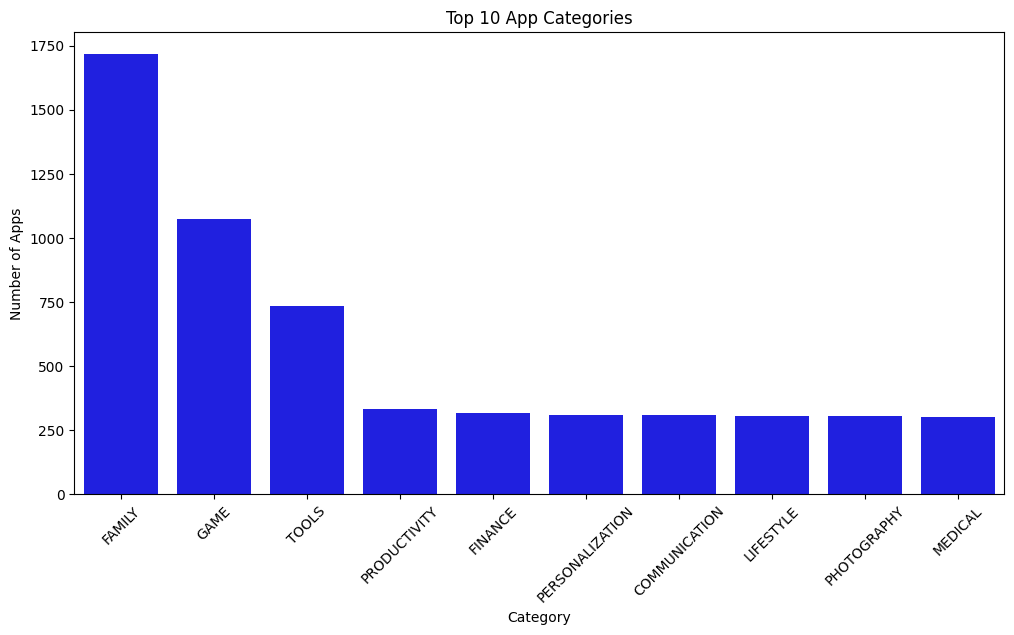

In [19]:
# Plotting category distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=category_counts.index[:10], 
    y=category_counts.values[:10], 
    color='blue'  # Using a single color for all bars
)
plt.title('Top 10 App Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


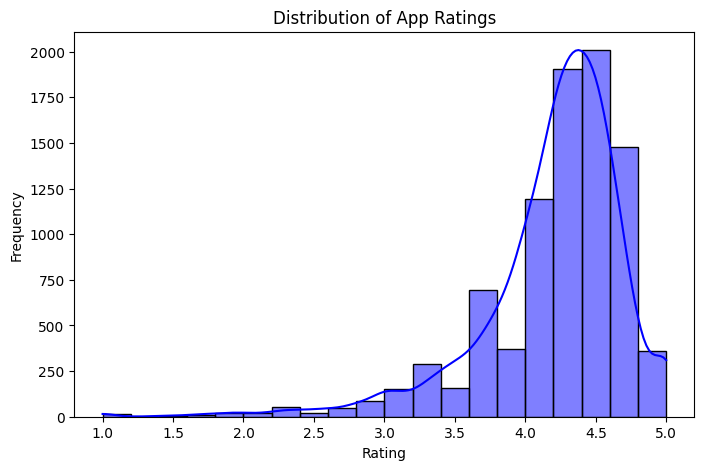

In [20]:
# Analyzing app ratings
plt.figure(figsize=(8, 5))
sns.histplot(store_df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Sentiment Distribution in User Reviews:
Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64


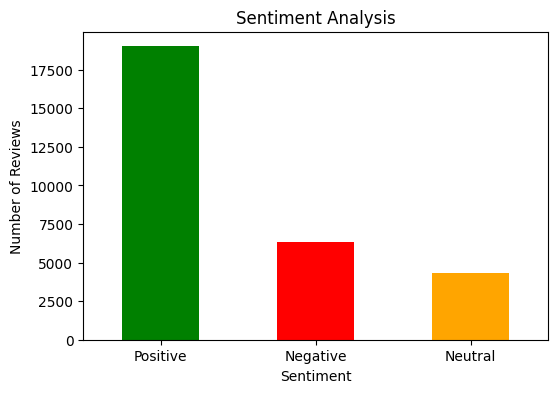

In [21]:
# Analyzing reviews
sentiment_counts = reviews_df['Sentiment'].value_counts()
print("\nSentiment Distribution in User Reviews:")
print(sentiment_counts)

# Plotting sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

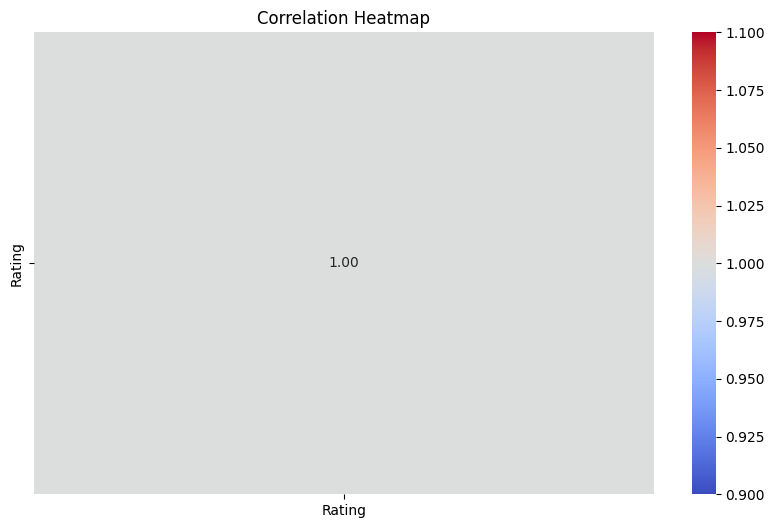

In [22]:
# Correlation heatmap
numeric_cols = store_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()